In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os
import json

ModuleNotFoundError: No module named 'pandas'

In [2]:
def get_gencommitment(res_dir, rundate, policy):
    file = os.path.join(res_dir, rundate, f'{policy}/{policy}_{rundate}/UC_2019-01-01.json')
    with open(file, 'r') as f:
        data = json.load(f)
        commitment = data['Commitment status']
    return commitment


def get_nostartshut(res_dir, rundate, policy):
    file = os.path.join(res_dir, rundate, f'{policy}/{policy}_{rundate}/UC_2019-01-01.json')
    nostartup = []
    noshutdown = []
    with open(file, 'r') as f:
        data = json.load(f)
        startup = data['Start up']
        shutdown = data['Shut down']
    for key in startup.keys():
        if sum(startup[key]) == 0:
            nostartup.append(key)
    for key in shutdown.keys():
        if sum(shutdown[key]) == 0:
            noshutdown.append(key)
    return nostartup, noshutdown

def get_prices(res_dir, rundate, policy):
    file = os.path.join(res_dir, rundate, f'{policy}/{policy}_{rundate}/UC_2019-01-01.json')
    with open(file, 'r') as f:
        data = json.load(f)
        LMP = data['Hourly average LMP']
        res_60T = data['Hourly average reserve price 60Total']
        res_10S = data['Hourly average reserve price 10Spin']
        res_10T = data['Hourly average reserve price 10Total']
        res_30T = data['Hourly average reserve price 30Total']
    return LMP, res_10S, res_10T, res_30T, res_60T

def print_results(rundate, policy):
    LMP, res_10S, res_10T, res_30T, res_60T = get_prices(res_dir, rundate, policy)
    print('Rundate is ', rundate)
    print('Average LMP is ', np.average(LMP))
    print('Average 10S reserve price is ', np.average(res_10S))
    print('Average 10T reserve price is ', np.average(res_10T))
    print('Average 30T reserve price is ', np.average(res_30T))
    print('Average 60T reserve price is ', np.average(res_60T))

In [4]:
res_dir = "/Users/hanshu/Desktop/Price_formation/Result"
policy = 'MF'
print('Policy is ', policy)
print_results(datetime(2024,11,11).strftime("%Y-%m-%d"), policy)
print_results(datetime(2024,11,13).strftime("%Y-%m-%d"), policy)
print_results(datetime(2024,11,14).strftime("%Y-%m-%d"), policy)

Policy is  MF
Rundate is  2024-11-11
Average LMP is  1137.7408749121541
Average 10S reserve price is  137.16126595754466
Average 10T reserve price is  98.95177035281081
Average 30T reserve price is  41.66659166023025
Average 60T reserve price is  0.0
Rundate is  2024-11-13
Average LMP is  1452.470015146081
Average 10S reserve price is  176.32521572634658
Average 10T reserve price is  135.90509442276783
Average 30T reserve price is  61.09469348928483
Average 60T reserve price is  0.0
Rundate is  2024-11-14
Average LMP is  1488.531935239876
Average 10S reserve price is  151.53579074892247
Average 10T reserve price is  119.11468588210856
Average 30T reserve price is  55.773425084960785
Average 60T reserve price is  0.0


In [4]:
res_dir = "/Users/hanshu/Desktop/Price_formation/Result"
policy = 'MF'
rundate = datetime(2024,11,27).strftime("%Y-%m-%d")
file = os.path.join(res_dir, rundate, f'{policy}/{policy}_{rundate}/UC_2019-01-31.json')
with open(file, 'r') as f:
    data = json.load(f)

edfile = os.path.join(res_dir, rundate, f'{policy}/ED_{policy}_{rundate}/ED_2019-01-31.json')
with open(edfile, 'r') as f:
    eddata = json.load(f)

In [5]:
# data['SOC Dual Mean']
df = pd.DataFrame(data['SOC Dual Mean'])
data.keys()

dict_keys(['Time', 'Hourly average LMP', 'Hourly average reserve price 10Spin', 'Hourly average reserve price 10Total', 'Hourly average reserve price 30Total', 'Hourly average reserve price 60Total', 'SOC Dual Mean', 'Charge consumers', 'Load Curtailment', 'Renewable Generation', 'Generator Dispatch', 'Energy Revenues', 'Reserve Revenues', 'Storage Energy', 'Other Profits', 'Commitment status', 'Start up', 'Shut down'])

In [14]:
def battery_action(data, b):
    discharge = data['Storage Action'][b]['Discharge']
    charge = data['Storage Action'][b]['Charge']
    discharge = np.array(discharge).flatten()
    charge = np.array(charge).flatten()
    return [kd_d - kd_c for kd_d, kd_c in zip(discharge, charge)]

ba_action = battery_action(eddata, 'BA')
ph_action = battery_action(eddata, 'PH')
# data['SOC Dual Mean']['BA']

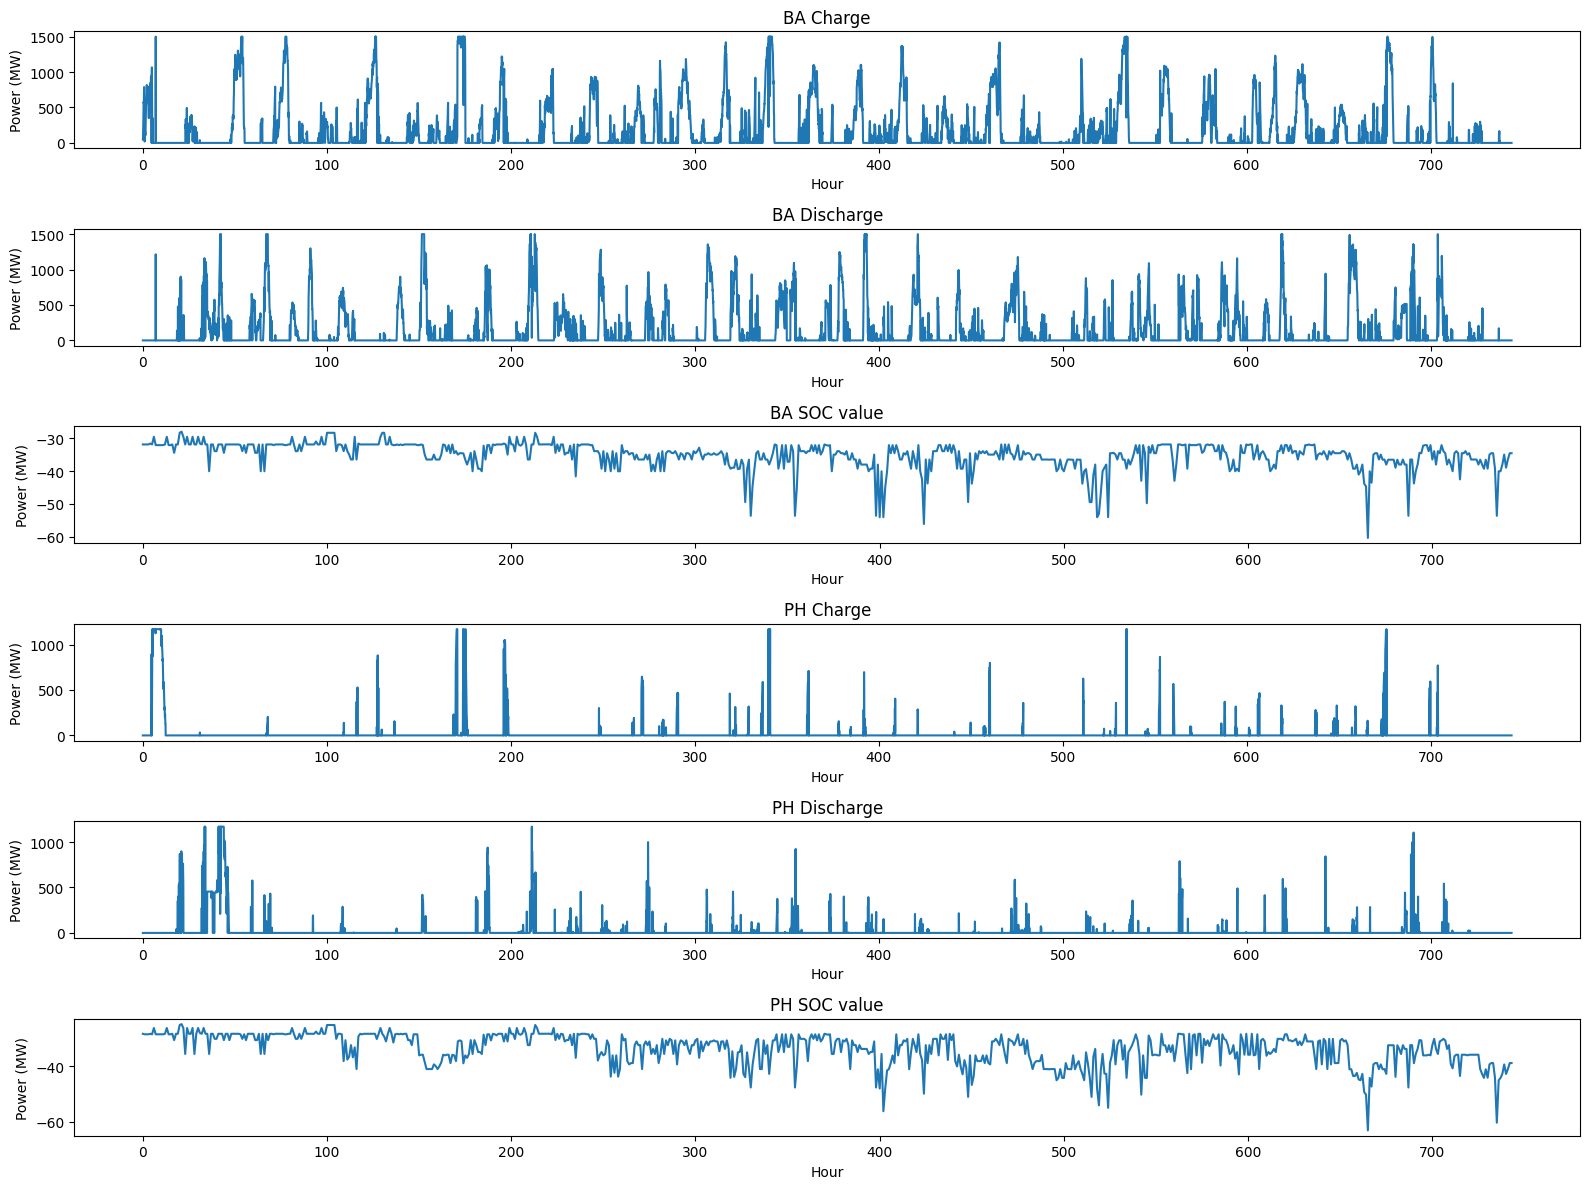

In [15]:
ba_discharge = eddata['Storage Action']['BA']['Discharge']
ba_discharge = np.array(ba_discharge).flatten()
ba_charge = eddata['Storage Action']['BA']['Charge']
ba_charge = np.array(ba_charge).flatten()
ph_discharge = eddata['Storage Action']['PH']['Discharge']
ph_discharge = np.array(ph_discharge).flatten()
ph_charge = eddata['Storage Action']['PH']['Charge']
ph_charge = np.array(ph_charge).flatten()

x = np.linspace(0, len(ba_charge)//12, len(ba_charge))
fig, ax = plt.subplots(6,figsize=(16,12))
for i in range(6):
    if i == 0:
        ax[i].plot(x, ba_charge)
        ax[i].set_title('BA Charge')
    elif i == 1:
        ax[i].plot(x, ba_discharge)
        ax[i].set_title('BA Discharge')
    elif i == 2:
        ax[i].plot(data['SOC Dual Mean']['BA'])
        ax[i].set_title('BA SOC value')
    elif i == 3:
        ax[i].plot(x, ph_charge)
        ax[i].set_title('PH Charge')
    elif i == 4:
        ax[i].plot(x, ph_discharge)
        ax[i].set_title('PH Discharge')
    elif i == 5:
        ax[i].plot(data['SOC Dual Mean']['PH'])
        ax[i].set_title('PH SOC value')
    ax[i].set_xlabel('Hour')
    ax[i].set_ylabel('Power (MW)')
plt.tight_layout()  
plt.show()

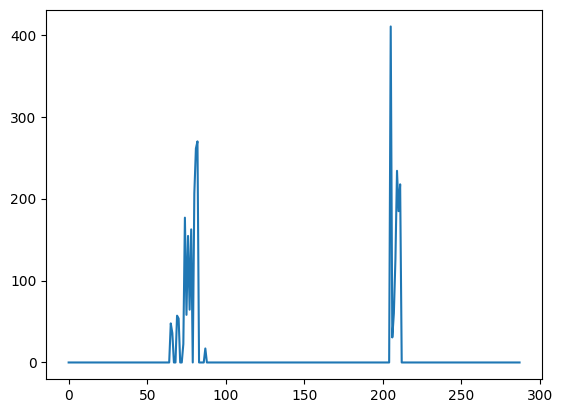

In [8]:
offset = 20*24*12
plt.plot(ph_charge[offset:offset+24*12])

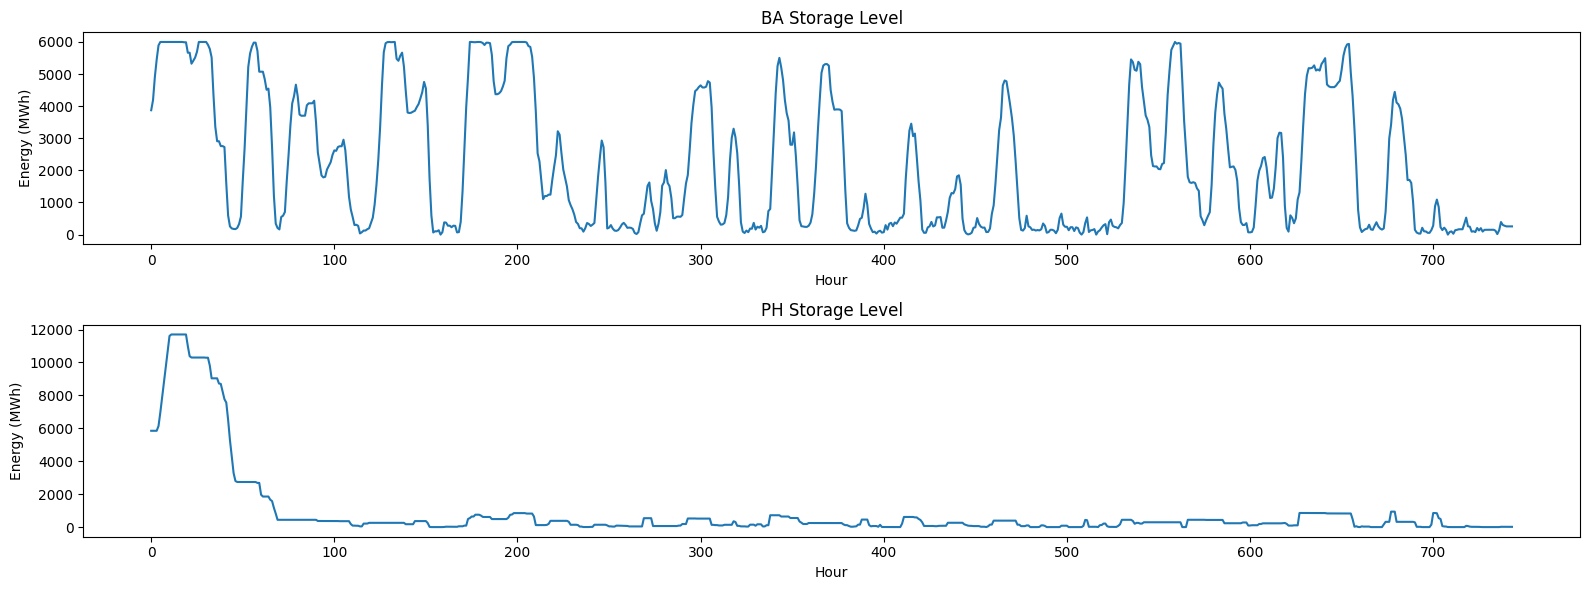

In [7]:
fig, ax = plt.subplots(2,figsize=(16,6))
for i in range(2):
    if i == 0:
        ax[i].plot(eddata['Storage Energy']['BA'])
        ax[i].set_title('BA Storage Level')
    else:
        ax[i].plot(eddata['Storage Energy']['PH'])
        ax[i].set_title('PH Storage Level')
    ax[i].set_xlabel('Hour')
    ax[i].set_ylabel('Energy (MWh)')
plt.tight_layout()  
plt.show()

In [21]:
len(eddata['Storage Energy']['BA'])

744

In [6]:
ba_discharge = eddata['Storage Action']['BA']['Discharge']
ba_discharge = np.array(ba_discharge).flatten()
ba_charge = eddata['Storage Action']['BA']['Charge']
ba_charge = np.array(ba_charge).flatten()
ph_charge = eddata['Storage Action']['PH']['Charge']
ph_charge = np.array(ph_charge).flatten()
ph_discharge = eddata['Storage Action']['PH']['Discharge']
ph_discharge = np.array(ph_discharge).flatten()
time_idx = datetime(2019,2,1) + pd.to_timedelta(np.arange(len(ba_charge))*300, unit='s')

ph_init = 0
ph_SOC = []
for kb_c, kb_d in zip(ph_charge, ph_discharge):
    if len(ph_SOC) == 0:
        ph_SOC.append(ph_init + 0.8*kb_c/12 - kb_d/(12*0.8))
    else:
        ph_SOC.append(ph_SOC[-1] + 0.8*kb_c/12 - kb_d/(12*0.8))
        
ba_init = eddata['Storage Energy']['BA'][0] - 0.9*sum(ba_charge[0:12])/12 + sum(ba_discharge[0:12])/(12*0.9)
ba_SOC = []
for kb_c, kb_d in zip(ba_charge, ba_discharge):
    if len(ba_SOC) == 0:
        ba_SOC.append(ba_init + 0.9*kb_c/12 - kb_d/(12*0.9))
    else:
        ba_SOC.append(ba_SOC[-1] + 0.9*kb_c/12 - kb_d/(12*0.9))


storage_df = pd.DataFrame({'Time': time_idx, 'BA_Charge': ba_charge, 'BA_Discharge': ba_discharge, 'BA_SOC':ba_SOC, 'PH_Charge': ph_charge, 'PH_Discharge': ph_discharge, 'PH_SOC': ph_SOC})
# save storage action to csv
# storage_df.to_csv(os.path.join(res_dir, 'storage_action.csv'), index=False)



In [7]:
storage_df.describe().round(2)

,Time,BA_Charge,BA_Discharge,BA_SOC,PH_Charge,PH_Discharge,PH_SOC
count,600,600.00,600.00,600.00,600.00,600.00,600.00
mean,2019-02-02 00:57:30,39.03,34.29,155.36,0.15,0.10,0.32
min,2019-02-01 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2019-02-01 12:28:45,0.00,0.00,81.98,0.00,0.00,0.00
50%,2019-02-02 00:57:30,0.00,0.00,148.55,0.00,0.00,0.00
75%,2019-02-02 13:26:15,19.17,11.45,204.44,0.00,0.00,0.00
max,2019-02-03 01:55:00,675.12,423.00,455.43,46.46,59.32,6.18
std,NaN,93.85,77.39,89.02,2.67,2.42,1.37


In [8]:
data['Reserve Revenues']['BA']


[439267.31772019225,
 165892.7664585917,
 7694.1455515781845,
 25762.634154703028,
 15656.489804516457,
 58487.07215028247,
 20205.17463560886,
 345345.0984789517,
 210122.75812500028,
 160093.53000000017,
 160243.53000000006,
 18455.936927566985,
 80202.8742784784,
 154235.93765461782,
 5698.082944006251,
 5275.249596214305,
 0.0,
 0.0,
 21682.041894782033,
 20497.851780215402,
 110741.28704839661,
 13371.35169091214,
 11042.987436822943,
 37502.47784392454,
 136456.1561260123,
 124977.61099385515,
 11458.927897748612,
 8364.040908642879,
 9935.805203724163,
 4494.221870374803,
 10126.470079714976,
 0.0,
 0.0,
 0.0,
 17624.83863594604,
 26061.72100563455,
 1338.3220862330409,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3715.4353867236346,
 0.0,
 0.0,
 0.0,
 0.0]

In [54]:
eddata['Storage Energy']['BA']

[56.97585258879345,
 0.0,
 32.71400244365629,
 49.69980918928106,
 91.58750239237649,
 115.5033772185459,
 102.79430515696471,
 148.23475000000013,
 148.23475000000013,
 148.23475000000013,
 148.37363888888896,
 148.70837162590516,
 152.84536420447088,
 151.24622452477314,
 181.75575973659645,
 203.38196336070695,
 247.3627452051675,
 426.81772085115074,
 274.5305854369628,
 222.94818430072453,
 204.44366448442887,
 188.79158403806787,
 304.07436615041087,
 275.5011105151284,
 131.12169926898474,
 65.40269892349835,
 57.44491480962749,
 84.31164301221659,
 48.19777497530306,
 11.133364661207333,
 101.05159978106305,
 125.26202934909456,
 327.561706559596,
 219.52641407162875,
 56.98475000000003,
 156.01851851851873,
 199.72035433119464,
 153.33333333333348,
 168.14914035790807,
 168.14914035790807,
 168.14914035790807,
 455.4284608853609,
 276.54715063261204,
 205.9638755613164,
 205.9638755613164,
 72.09265856795675,
 72.09265856795675,
 59.89010002860469,
 59.89010002860469,
 59.8901

In [56]:
eddata['Storage Energy']['PH']

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6.179679167473845,
 6.179679167473845,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

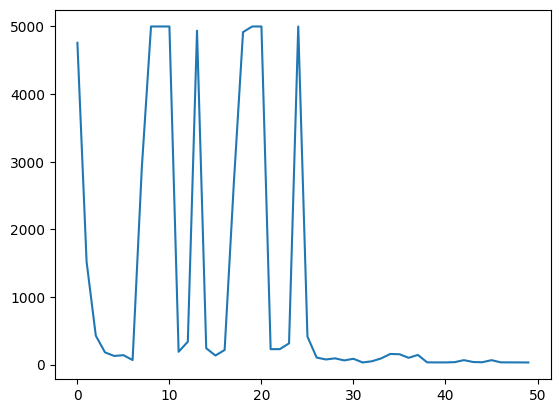

In [8]:
LMP = data['Hourly average LMP']
res_60T = data['Hourly average reserve price 60Total']
res_10S = data['Hourly average reserve price 10Spin']
res_10T = data['Hourly average reserve price 10Total']
res_30T = data['Hourly average reserve price 30Total']
plt.plot(LMP)

In [10]:
T = len(data['Commitment status']['Gowanus 2-5'])
Online_gens = [0]*T
for t in range(T):
    for key in data['Commitment status'].keys():
        if data['Commitment status'][key][t] == 1:
            Online_gens[t] += 1
print(Online_gens)

[60, 63, 63, 60, 60, 48, 50, 51, 54, 53, 59, 76, 70, 66, 96, 77, 107, 72, 72, 79, 79, 87, 78, 62, 58, 74, 85, 58, 57, 57, 53, 67, 111, 53, 61, 99, 58, 76, 68, 64, 72, 71, 58, 70, 63, 61, 120, 78, 103, 65]


In [11]:
policy = 'MF'
rundate = datetime(2024,11,17).strftime("%Y-%m-%d")
Janfile = os.path.join(res_dir, rundate, f'{policy}/{policy}_{rundate}/UC_2019-01-01.json')
with open(Janfile, 'r') as f:
    Jandata = json.load(f)
T = len(Jandata['Commitment status']['Gowanus 2-5'])
Jan_Online_gens = [0]*T
for t in range(T):
    for key in Jandata['Commitment status'].keys():
        if Jandata['Commitment status'][key][t] == 1:
            Jan_Online_gens[t] += 1
print(Jan_Online_gens)

[44, 43, 43, 49, 49, 37, 39, 40, 71, 45, 45, 62, 58, 55, 72, 51, 59, 51, 69, 66, 64, 64, 63, 55, 81, 52, 52, 51, 67, 45, 47, 48, 56, 62, 72, 67, 70, 95, 74, 74, 46, 54, 78, 66, 77, 61, 71, 53, 51, 38, 38, 38, 38, 39, 56, 57, 57, 56, 55, 54, 55, 56, 56, 59, 90, 62, 65, 71, 101, 74, 107, 62, 49, 49, 65, 65, 49, 49, 50, 50, 56, 51, 52, 51, 82, 52, 52, 40, 40, 46, 105, 88, 70, 75, 69, 78, 74, 51, 49, 49, 49, 49, 64, 48, 68, 56, 60, 71, 53, 51, 51, 56, 97, 46, 46, 54, 62, 52, 85, 52, 55, 49, 65, 49, 37, 37, 84, 37, 49, 66, 58, 60, 51, 51, 51, 75, 39, 96, 49, 109, 59, 125, 60, 54, 56, 79, 47, 47, 47, 47, 45, 47, 63, 59, 64, 90, 66, 63, 59, 88, 45, 45, 45, 48, 76, 65, 56, 54, 52, 52, 52, 52, 52, 54, 55, 43, 48, 49, 49, 57, 60, 58, 80, 60, 61, 80, 102, 84, 114, 83, 76, 81, 61, 54, 54, 69, 53, 53, 54, 85, 70, 68, 75, 75, 87, 57, 59, 56, 100, 57, 62, 74, 124, 62, 58, 65, 66, 50, 50, 80, 66, 50, 53, 53, 55, 59, 86, 63, 55, 55, 44, 44, 44, 45, 49, 96, 67, 66, 57, 54, 50, 66, 50, 50, 40, 40, 40, 45

In [12]:
max(Jan_Online_gens)

129

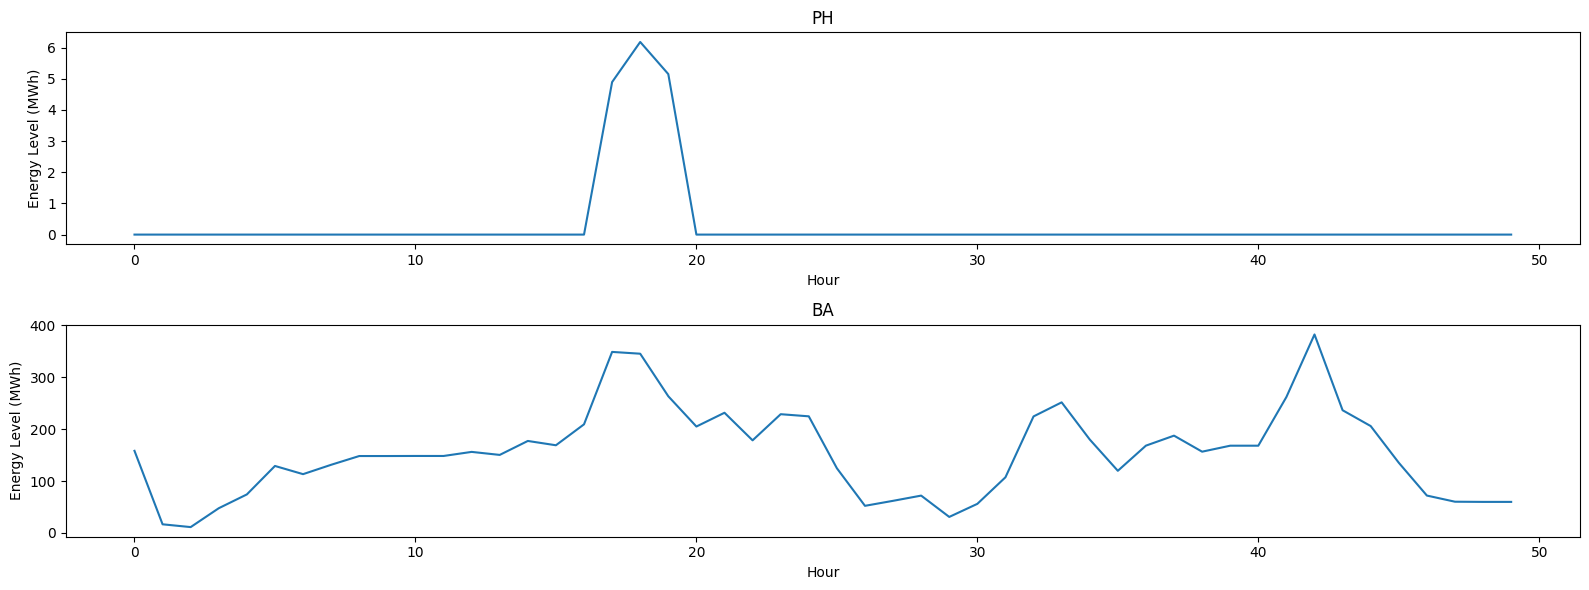

In [19]:
fig, ax = plt.subplots(2,figsize=(16,6))
ba = ['PH', 'BA']
j = 5
for i in range(2):
    ax[i].plot(data['Storage Energy'][ba[i]])
    ax[i].set_title(ba[i])
    ax[i].set_xlabel('Hour')
    ax[i].set_ylabel('Energy Level (MWh)')
plt.tight_layout()  
plt.show()
# PH 11700 MWh, 0.8 => 0.64
# BA 6000 MWh, 0.9 => 0.81
# Check the dual of SOC balance constraint
# dual > LMP, not charge 


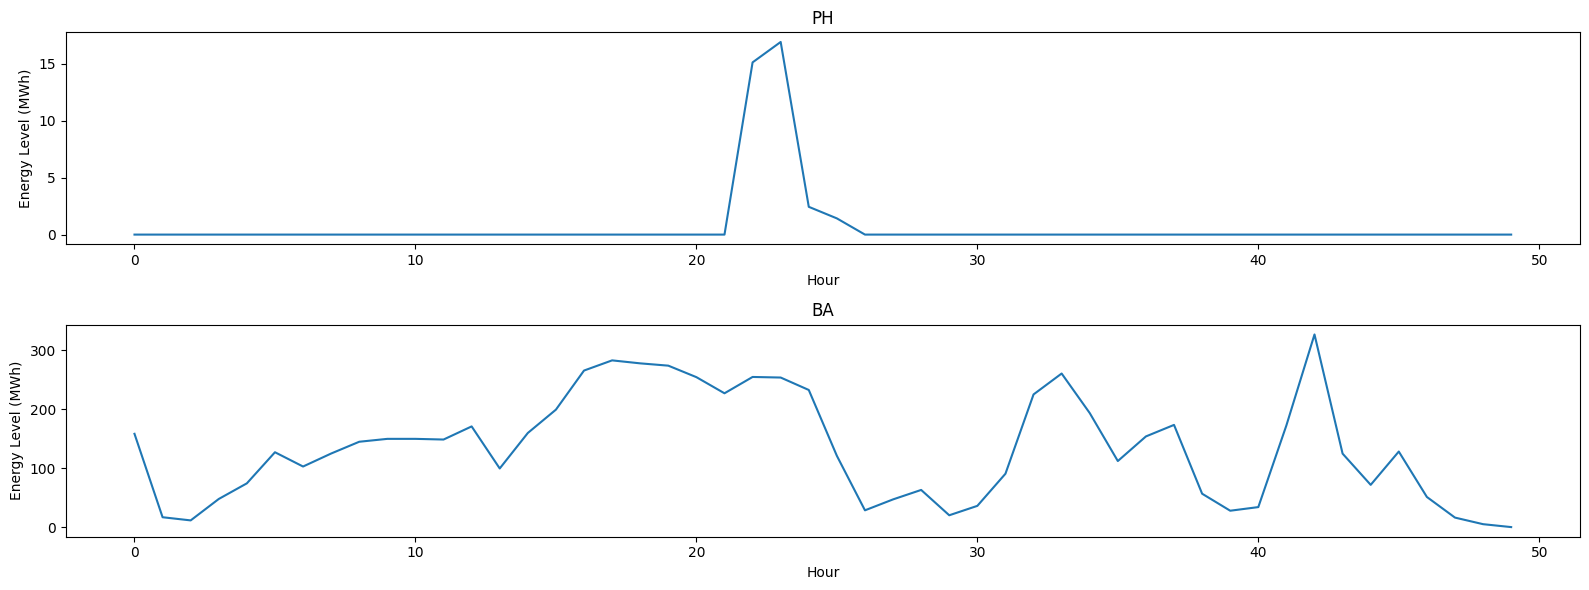

In [23]:
fig, ax = plt.subplots(2,figsize=(16,6))
ba = ['PH', 'BA']
j = 5
for i in range(2):
    ax[i].plot(olddata['Storage Energy'][ba[i]])
    ax[i].set_title(ba[i])
    ax[i].set_xlabel('Hour')
    ax[i].set_ylabel('Energy Level (MWh)')
plt.tight_layout()  
plt.show()

IndexError: index 46 is out of bounds for axis 0 with size 46

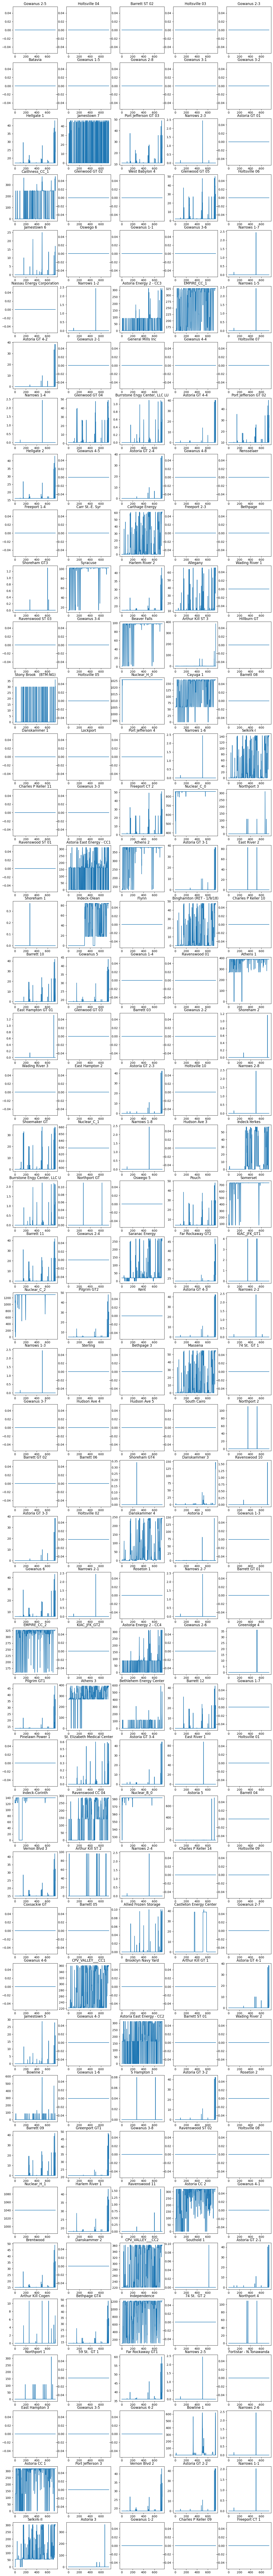

In [49]:
fig, ax = plt.subplots(46,5,figsize=(16,160))
gennames = list(data['Generator Dispatch'].keys())
for i, g in enumerate(gennames):
    ax[i//5, i%5].plot(data['Generator Dispatch'][g])
    ax[i//5, i%5].set_title(g)
    # ax[i//5, i%5].set_xlabel('Hour')
    # ax[i//5, i%5].set_ylabel('Energy Level (MWh)')
plt.tight_layout()  
plt.show()

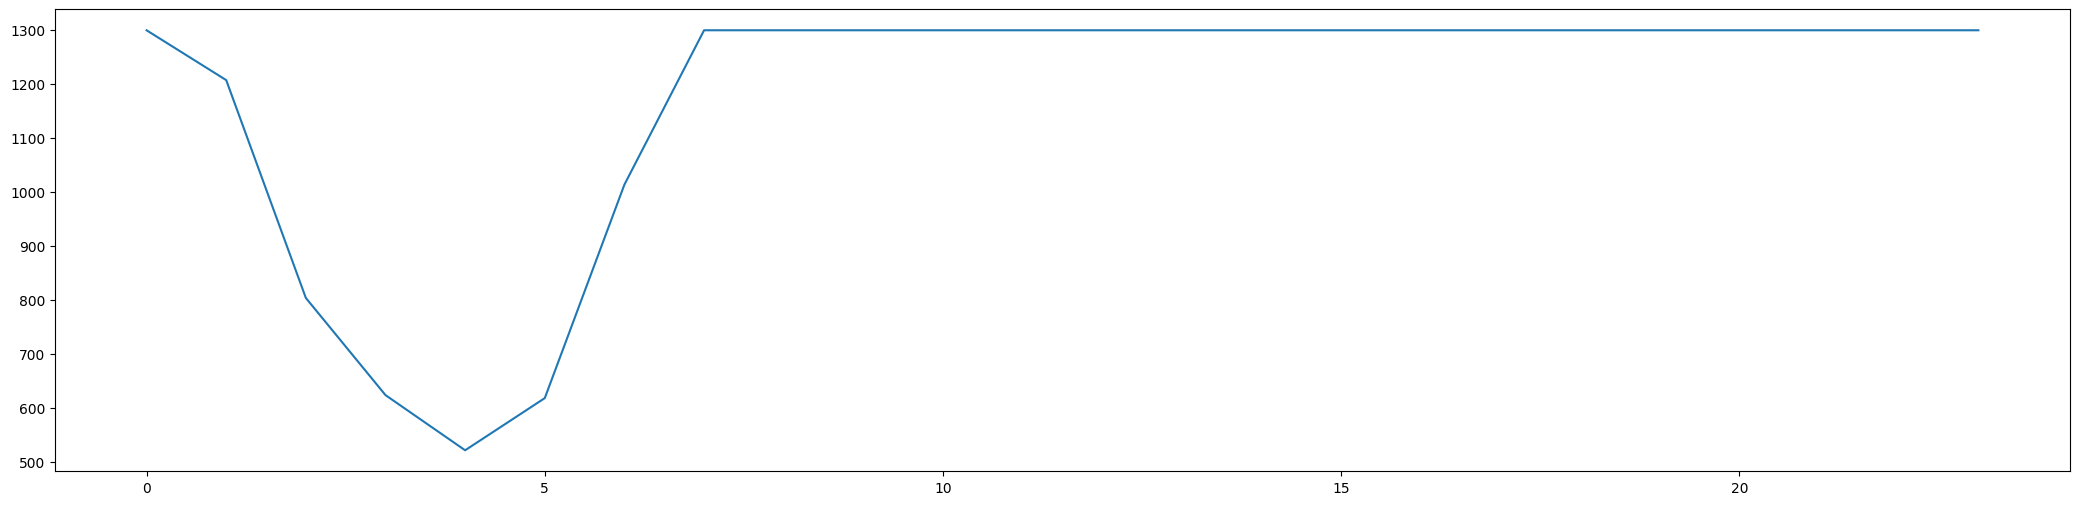

In [64]:
g = 'Nuclear_C_2'
plt.figure(figsize=(26,6))
i = 8
plt.plot(data['Generator Dispatch'][g][i*24:(i+1)*24])

In [11]:
import h5py
def get_history_data(datadir, name):
    data = []
    file_path = os.path.join(datadir, name + '_scenarios.h5')
    with h5py.File(file_path, 'r') as h5_file:
        keys = list(h5_file.keys())
        for key in keys:
            data.append(h5_file[key][0, 0])
    return data

def get_time_idx(datadir, name):
    file_path = os.path.join(datadir, name + '_scenarios.h5')
    with h5py.File(file_path, 'r') as h5_file:
        keys = list(h5_file.keys())
    return keys

datadir = '/Users/hanshu/Desktop/Price_formation/Data/generate_fr_KBoot/NYISO_Hour'
hour_load = get_history_data(datadir, 'load')
hour_wind = get_history_data(datadir, 'wind')
hour_solar = get_history_data(datadir, 'solar')
hour_renewable = [hour_wind[i] + hour_solar[i] for i in range(len(hour_wind))]

In [13]:
start = 3
length = len(data['Curtailment']['wind'])
pW = 1.38*np.array(hour_wind[start:start+length]) - np.array(data['Curtailment']['wind'])
pS = 10*np.array(hour_solar[start:start+length]) - np.array(data['Curtailment']['solar'])
used_renewable = np.array(hour_renewable[start:start+length]) - pS - pW

In [14]:
used_renewable.sort()
used_renewable

array([-1.71368300e+03, -1.55650820e+03, -1.51073313e+03, -1.49445022e+03,
       -1.44478225e+03, -1.43156035e+03, -1.38752325e+03, -1.33600260e+03,
       -1.23674718e+03, -1.22423011e+03, -1.21281296e+03, -1.15648302e+03,
       -1.10932994e+03, -1.08857025e+03, -1.06140665e+03, -1.04604448e+03,
       -1.04422740e+03, -9.89507397e+02, -9.78234843e+02, -9.65329362e+02,
       -9.08596334e+02, -8.94341138e+02, -8.56896318e+02, -8.51515564e+02,
       -8.48667102e+02, -8.33184904e+02, -8.06121607e+02, -7.89532788e+02,
       -7.87818009e+02, -7.54960508e+02, -7.30730195e+02, -7.15677341e+02,
       -7.14424397e+02, -7.07228018e+02, -6.98088988e+02, -6.64968830e+02,
       -6.62182862e+02, -6.48413245e+02, -6.48306431e+02, -6.38572787e+02,
       -6.19155285e+02, -6.13417809e+02, -5.90318804e+02, -5.86895311e+02,
       -5.79432926e+02, -5.76436049e+02, -5.65949343e+02, -5.51676229e+02,
       -5.38232744e+02, -5.28617550e+02, -5.28416020e+02, -5.06471063e+02,
       -4.94614928e+02, -

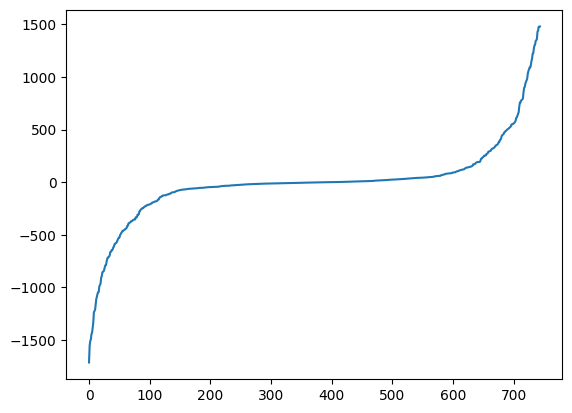

In [15]:
plt.plot(used_renewable)

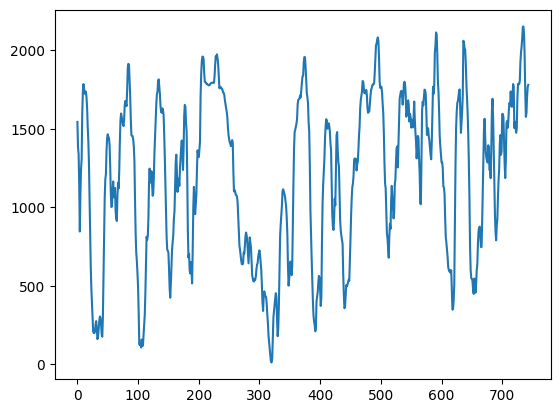

In [16]:
plt.plot(hour_renewable[start:start+length])

In [96]:
renewable_curtailment[0]

525.8471254635832

In [92]:
import h5py
def get_history_keys(datadir, name):
    data = []
    file_path = os.path.join(datadir, name + '_scenarios.h5')
    with h5py.File(file_path, 'r') as h5_file:
        keys = list(h5_file.keys())
    return keys

keys = get_history_keys(datadir, 'load')

keys

['2018-12-31T21:00:00',
 '2018-12-31T22:00:00',
 '2018-12-31T23:00:00',
 '2019-01-01T00:00:00',
 '2019-01-01T01:00:00',
 '2019-01-01T02:00:00',
 '2019-01-01T03:00:00',
 '2019-01-01T04:00:00',
 '2019-01-01T05:00:00',
 '2019-01-01T06:00:00',
 '2019-01-01T07:00:00',
 '2019-01-01T08:00:00',
 '2019-01-01T09:00:00',
 '2019-01-01T10:00:00',
 '2019-01-01T11:00:00',
 '2019-01-01T12:00:00',
 '2019-01-01T13:00:00',
 '2019-01-01T14:00:00',
 '2019-01-01T15:00:00',
 '2019-01-01T16:00:00',
 '2019-01-01T17:00:00',
 '2019-01-01T18:00:00',
 '2019-01-01T19:00:00',
 '2019-01-01T20:00:00',
 '2019-01-01T21:00:00',
 '2019-01-01T22:00:00',
 '2019-01-01T23:00:00',
 '2019-01-02T00:00:00',
 '2019-01-02T01:00:00',
 '2019-01-02T02:00:00',
 '2019-01-02T03:00:00',
 '2019-01-02T04:00:00',
 '2019-01-02T05:00:00',
 '2019-01-02T06:00:00',
 '2019-01-02T07:00:00',
 '2019-01-02T08:00:00',
 '2019-01-02T09:00:00',
 '2019-01-02T10:00:00',
 '2019-01-02T11:00:00',
 '2019-01-02T12:00:00',
 '2019-01-02T13:00:00',
 '2019-01-02T14: